### Часть I: О теореме Байеса

#### Вопрос 1
Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.
#### Ответ:
Прокурор берет априорную вероятность что у случаного человека будет такая группа крови и приравнивает эту вероятность к условной вероятности $P(\text{редкая группа крови}|\text{невиновен})$ и после этого делает вывод о вероятности $P(\text{невиновен}|\text{редкая группа крови})$, что она мала (точнее что $P(\text{невиновен}|\text{редкая группа крови})$ большая).

Если $P(\text{редкая группа крови}|\text{невиновен})$ мала, это не значит, что мала $P(\text{невиновен}|\text{редкая группа крови})$ т.к.

$$P(\text{невиновен}|\text{редкая группа крови}) = \frac{P(\text{редкая группа крови}|\text{невиновен})*P(\text{невиновен})}{P(\text{редкая группа крови})}$$
Априорная вероятность невиновности довольно большая, редкая группа крови - редкая, поэтому итоговая условная вероятность большая


#### Вопрос 2

Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?

#### Ответ:

Адвокат приводит вероятность выбрать случайного человека из всех редкокровных, то есть он с такой же вероятностью виновен как и эти 10000 человек. Если нет других доказательств, то это хороший аргумент.

Но во-первых, эта вероятность не эквивалентна вероятности $𝑃(\text{виновен}|\text{редкая группа крови})$. Ему стоило оценить именно эту вероятность

Во-вторых, эта информация все равно в 100 раз сужает круг подозреваемых, и таким образом ее нельзя исключать из материалов дела

#### Вопрос 3

Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.stats import multivariate_normal
import seaborn as sns

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [2]:
# зависимость от false positive и false negative
# alpha - false positive
# beta - false negative
# вероятность болезни при условии t в зависимости от ошибок alpha и beta

def p(alpha, beta, t):
    if t == 1:
        return (1-beta)*0.01/((1-beta)*0.01 + alpha*0.99)
    else:
        return beta*0.01/(beta*0.01 + (1-alpha)*0.99)

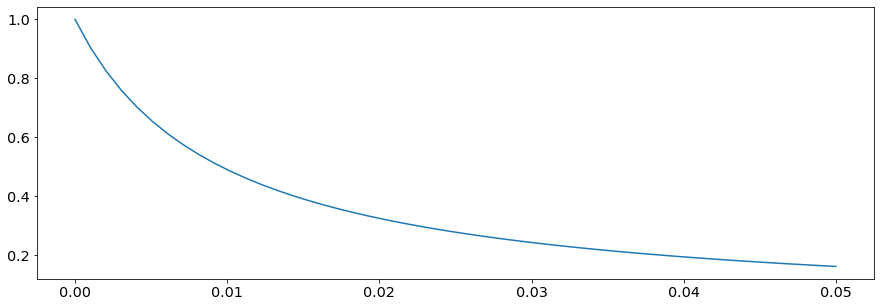

In [3]:
# зависимость p(d=1|t=1) от false-positive
alphas = np.linspace(0., 0.05)
y = p(alphas, beta=0.05, t=1)
plt.plot(alphas, y)

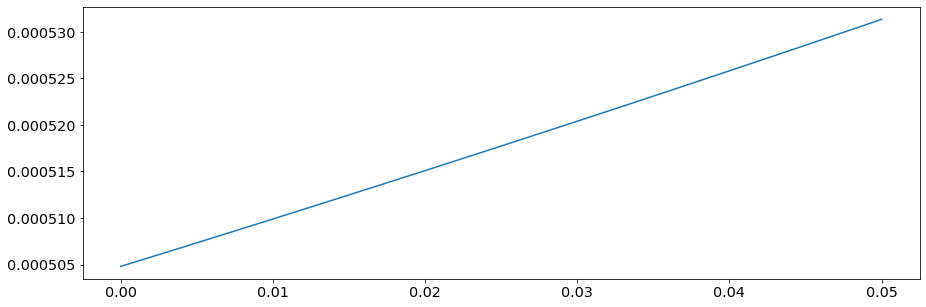

In [4]:
# зависимость p(d=1|t=0) от false-positive
alphas = np.linspace(0., 0.05)
y = p(alphas, beta=0.05, t=0)
plt.plot(alphas, y)

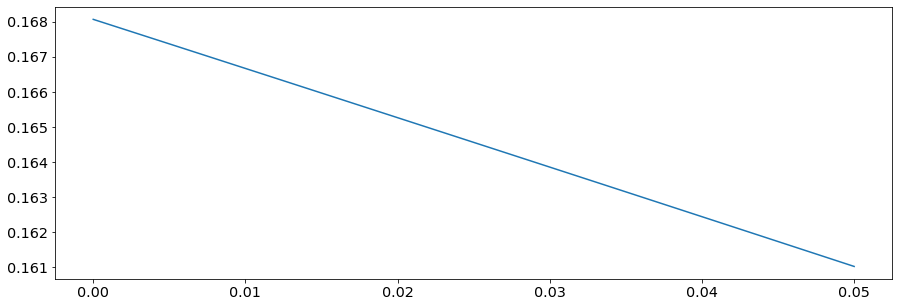

In [5]:
# зависимость p(d=1|t=1) от false-negative
betas = np.linspace(0., 0.05)
y = p(alpha=0.05, beta=betas, t=1)
plt.plot(alphas, y)

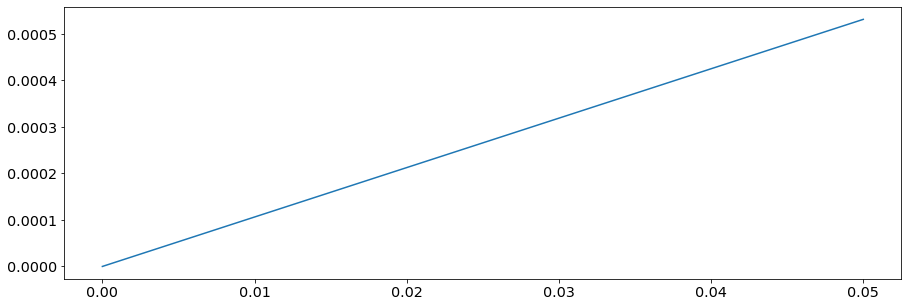

In [6]:
# зависимость p(d=1|t=0) от false-negative
betas = np.linspace(0., 0.05)
y = p(alpha=0.05, beta=betas, t=0)
plt.plot(alphas, y)

#### Ответ:

Значительнее всего снижается p(d=1|t=1) при снижении false-positive. p(d=1|t=0) снижается при уменьшении false-negative, но это вероятность и так мала, поэтому целесообразно сосредоточиться на снижении false-positive ошибки

### Часть II: О линейной регрессии

#### Вопрос 1:
Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.

In [7]:
covid = pd.read_csv('owid-covid-data.csv')

In [8]:
covid = covid[(covid['location'] == 'Russia')
      &(covid['date'] >= '2020-03-03')]

covid['new_cases'] = covid['new_cases'].replace(0, 1)

In [9]:
covid_train = covid.iloc[:50, :]
covid_test = covid.iloc[:50, :]

<AxesSubplot:>

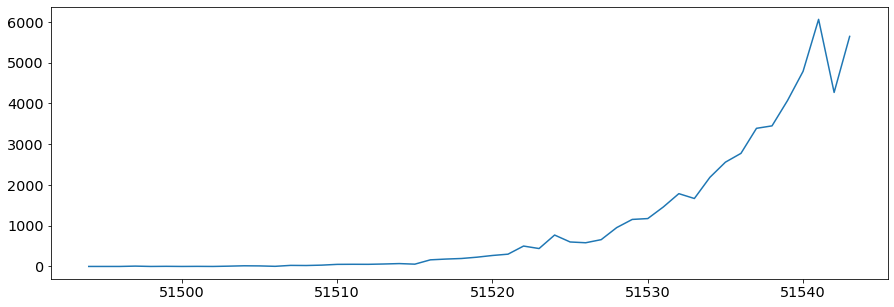

In [10]:
covid_train['new_cases'].plot()

<AxesSubplot:>

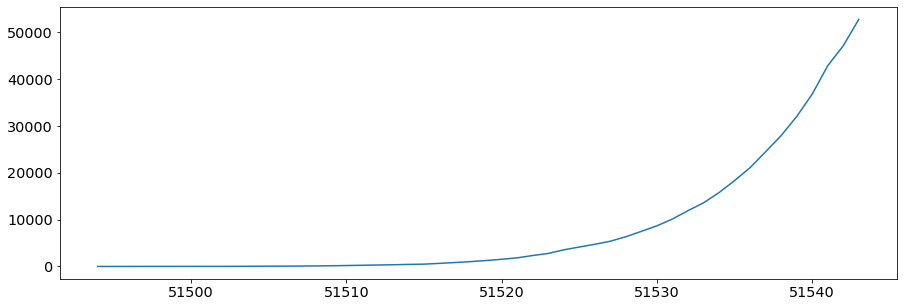

In [11]:
covid_train['total_cases'].plot()

#### Вопрос 2а
Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.

In [12]:
y_train = np.log(covid_train['total_cases'].to_numpy())
x_train = np.array(range(1, len(y_train)+1))
len(y_train), len(x_train)

(50, 50)

In [13]:
lr = LinearRegression()
lr.fit(x_train.reshape(-1, 1), y_train)
lr.coef_, lr.intercept_

(array([0.19829091]), 1.62244623644881)

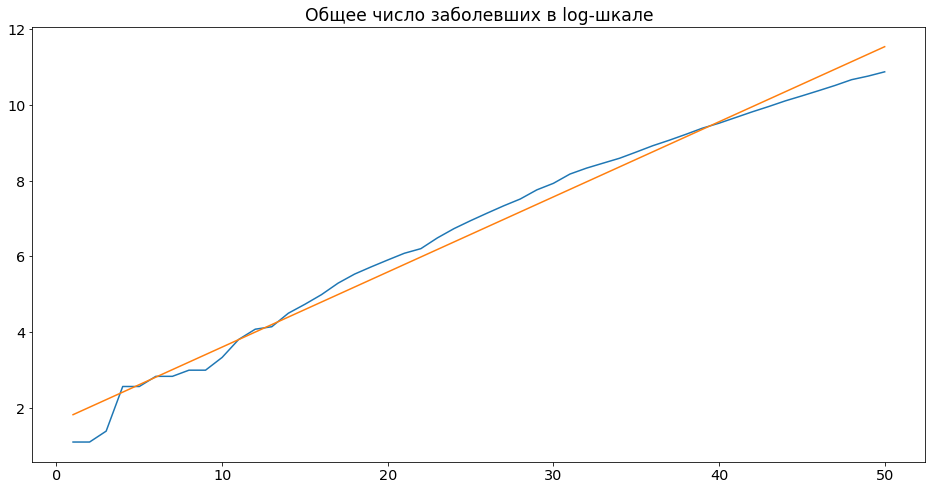

In [14]:
y_pred = lr.predict(x_train.reshape(-1, 1))

plt.figure(figsize=(16,8))
plt.title('Общее число заболевших в log-шкале')
plt.plot(x_train, y_train)
plt.plot(x_train, y_pred)

(0.0, 60000.0)

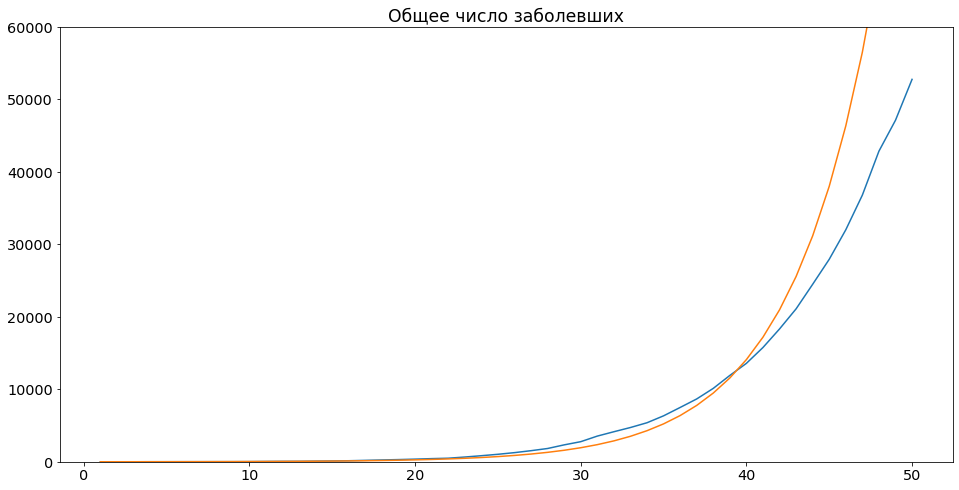

In [15]:
plt.figure(figsize=(16,8))
plt.title('Общее число заболевших')
plt.plot(x_train, np.exp(y_train))
plt.plot(x_train, np.exp(y_pred))
plt.ylim(0, 60000)

#### Вопрос 2b

Найдите апостериорное распределение параметров этой модели для
достаточно широкого априорного распределения. Требующееся для этого
значение дисперсии шума в данных оцените, исходя из вашей же
максимальной апостериорной модели (это фактически первый шаг
эмпирического Байеса).

In [16]:
# "Требующееся для этого значение дисперсии шума в данных оцените,
# исходя из вашей же максимальной апостериорной модели"
# Я это понимаю так: максимальная апостериорная модель = обученная мной экспоненциальная модель
# значит диперсию шума будем искать так

sigma_noise = np.std(y_pred - y_train)

In [17]:
# возьмем априорное распределение параметров модели
mu, sigma = np.array([0, 0]), 2*np.array([[1, 0], [0, 1]])

In [18]:
# на лекции мы вывели формулы для апостериорного распределения параметров для линейной регрессии
# а также написали код для одной точки
# перепищем его для матрицы признаков

x_matrix = np.c_[np.ones(len(x_train)), x_train]

sigma_n = np.linalg.inv(
    np.linalg.inv(sigma) 
    + (1 / (sigma_noise ** 2)) * x_matrix.T @ x_matrix 
)
mu_n = sigma_n @ (np.linalg.inv(sigma) @ mu.T
                  + (1 / (sigma_noise ** 2)) * x_matrix.T @ np.array(y_train))

print(f'after bayesian update\nmean-vector:\n{mu_n}\ncovarience:\n{sigma_n}')

after bayesian update
mean-vector:
[1.61436785 0.19853058]
covarience:
[[ 9.99455630e-03 -2.96867588e-04]
 [-2.96867588e-04  1.16560495e-05]]


In [19]:
N=750

xs = np.linspace(-3, 3, N)
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 3, N)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def myplot_heatmap(Z):
    # Make the plot
    plt.axis('equal')
    plt.xlim((1.2, 1.9))
    plt.ylim((0.15, 0.25))
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)
    #plt.scatter(true_mu[0], true_mu[1], marker='*', s=120)

#### Ответ:
Параметры апостериорного распределения

mean-vector:
\begin{bmatrix}
1.61436785 & 0.19853058
\end{bmatrix}
covarience:
\begin{bmatrix}
9.99455630e-03 & -2.96867588e-04]\\
-2.96867588e-04 & 1.16560495e-05
\end{bmatrix}

/home/alexander/miniconda3/envs/2_ml/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


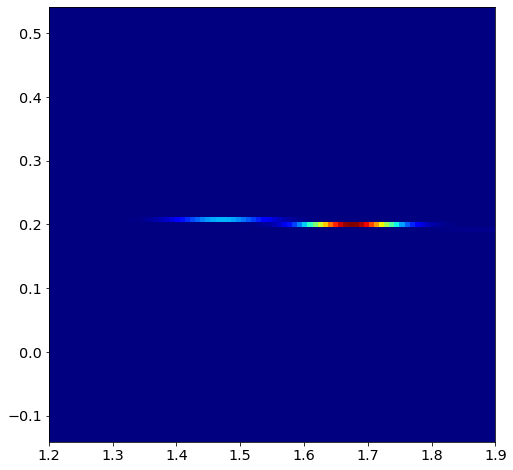

In [20]:
Z = multivariate_normal.pdf(pos, mean=mu_n, cov=sigma_n)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlim((1.2, 1.9))
ax.set_ylim((0.15, 0.25))
myplot_heatmap(Z)

#### Вопрос 2c
Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя
из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая
2020 года? к 1 июня? к 1 сентября? Постройте предсказательные
распределения (можно эмпирически, исходя из данных сэмплирования).

In [21]:
def myplot_sample_lines(mu, sigma, n=20, points=None):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu, sigma, n)

    # plt.axis('equal')
    for w in my_w:
        plt.plot(x_train, np.exp(w[0] + w[1]*x_train), 'k-', lw=.4)
    plt.ylim((0, 60000))
    plt.xlim((0, 51))
    if not points is None:
        plt.scatter(points[0], points[1], marker='*', s=200)

Посэмплируйте много разных экспонент, постройте графики

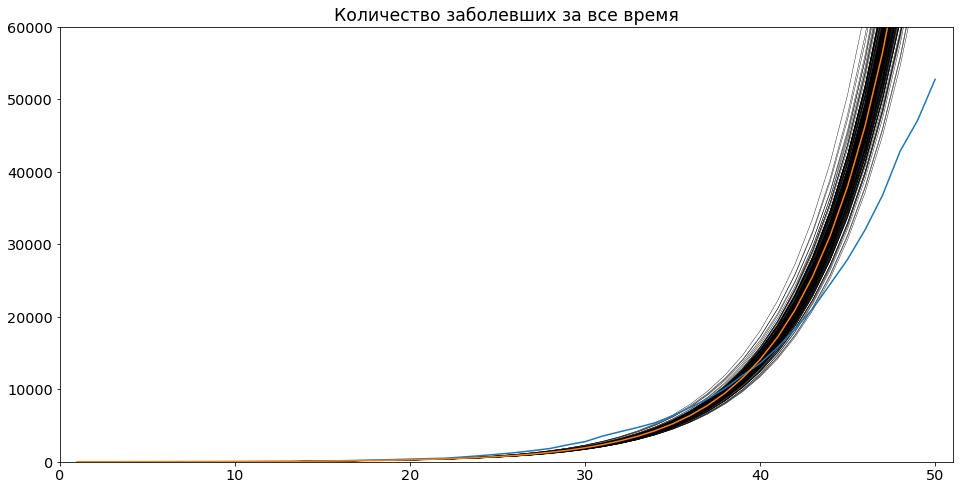

In [22]:
fig = plt.figure(figsize=(16, 8))
plt.title('Количество заболевших за все время')
myplot_sample_lines(mu_n, sigma_n, 200)
plt.plot(x_train, np.exp(y_train))
plt.plot(x_train, np.exp(y_pred))

#### Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).

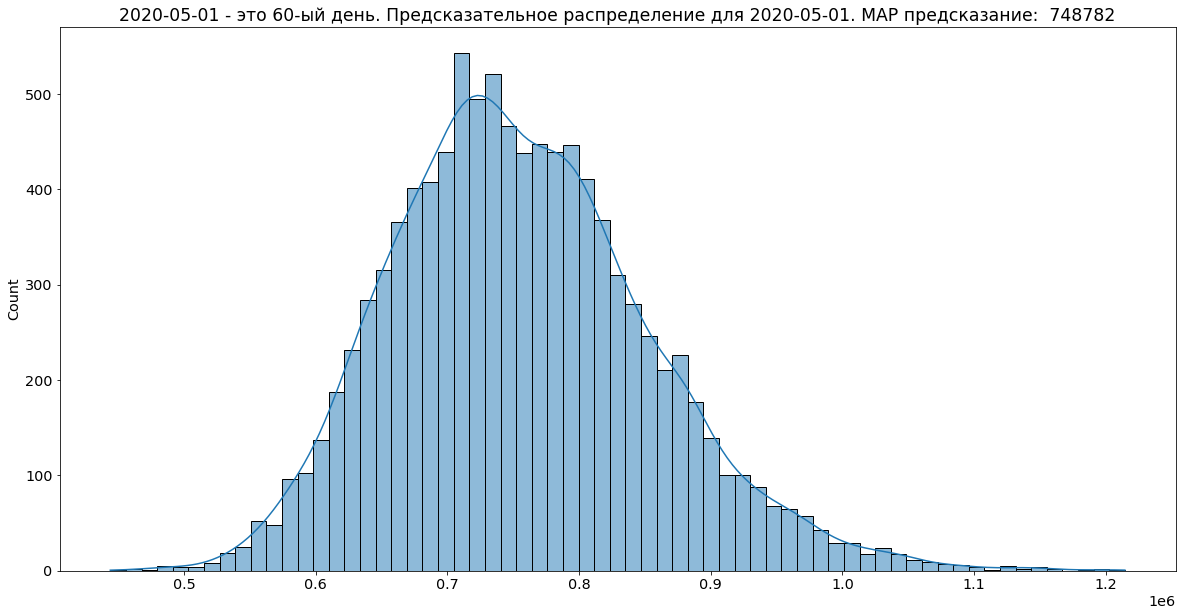

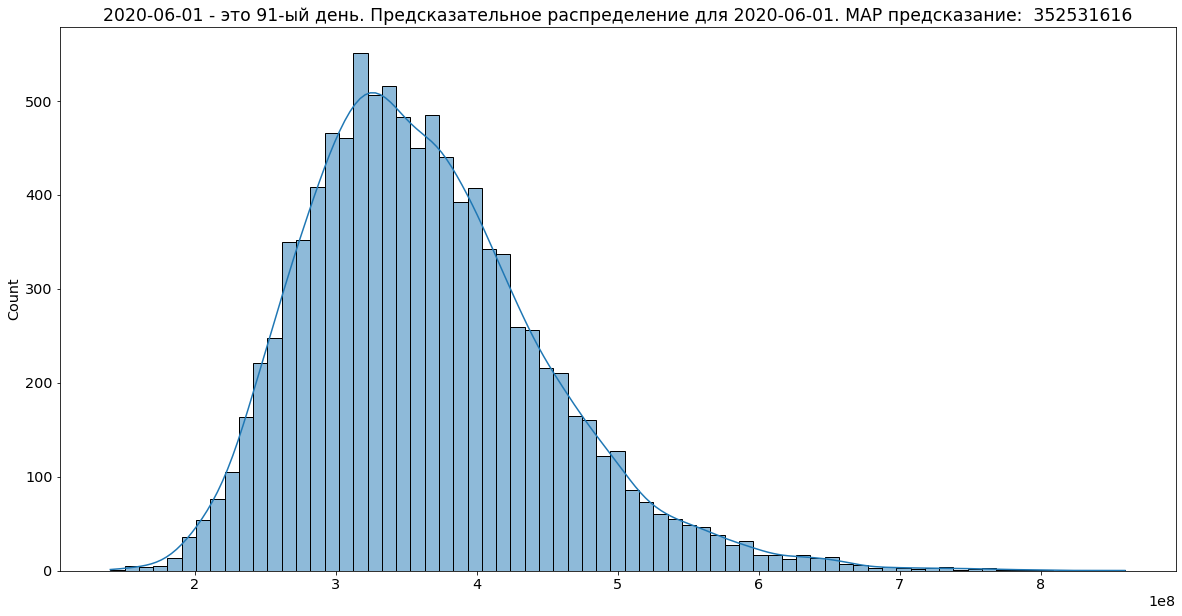

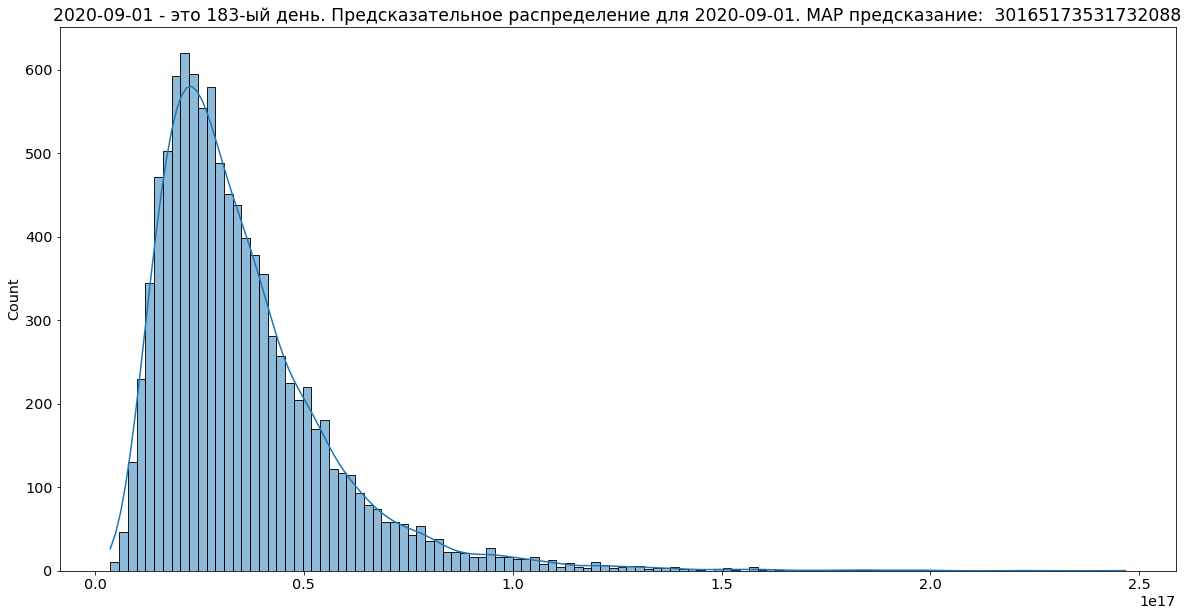

In [23]:
n = 10000
my_w = np.random.multivariate_normal(mu_n, sigma_n, n)

# plt.axis('equal')
for date in ['2020-05-01', '2020-06-01', '2020-09-01']:
    x = len(covid[covid.date <= date])
    #print()
    prediction_sample = np.array([np.exp(w[0] + w[1]*x) for w in my_w])

    plt.figure(figsize=(20,10))
    #print()
    #print()
    plt.title(
        f"{date} - это {x}-ый день."
        f' Предсказательное распределение для {date}.'
        f' MAP предсказание: {np.exp(mu_n[0] + mu_n[1]*x): .0f}'
    )
    sns.histplot(prediction_sample, kde=True)

#### Вопрос 3а

Кривая общего числа заболевших во время эпидемии в
реальности имеет сигмоидальный вид: после начальной фазы экспоненциального
роста неизбежно происходит насыщение. В качестве конкретной формы такой
сигмоиды давайте возьмём форму функции распределения для гауссиана:
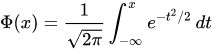

Предложите способ обучать параметры такой сигмоидальной функции при
помощи линейной регрессии.

#### Ответ: 
Если общее число зараженных это сигмоида, то можно предсказывать число новых заболевших как производную от сигмоиды

$$ new\_cases = e^{(a*x^2+b*x+c)} $$

или

$$ ln(new\_cases) = a*x^2+b*x+c $$

#### Вопрос 3b
Обучите эти параметры на датасете случаев коронавируса в России.
Найдите апостериорное распределение параметров этой модели для
достаточно широкого априорного распределения. Требующееся для этого
значение дисперсии шума в данных оцените, исходя из вашей же
максимальной апостериорной модели.

In [24]:
y_train = np.log(covid_train['new_cases'].to_numpy())
x_train = np.array(range(1, len(y_train)+1))

x_train = np.c_[x_train, x_train**2]
y_train.shape, x_train.shape

((50,), (50, 2))

In [25]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.coef_, lr.intercept_

(array([ 0.27928241, -0.00182979]), -0.674043025361077)

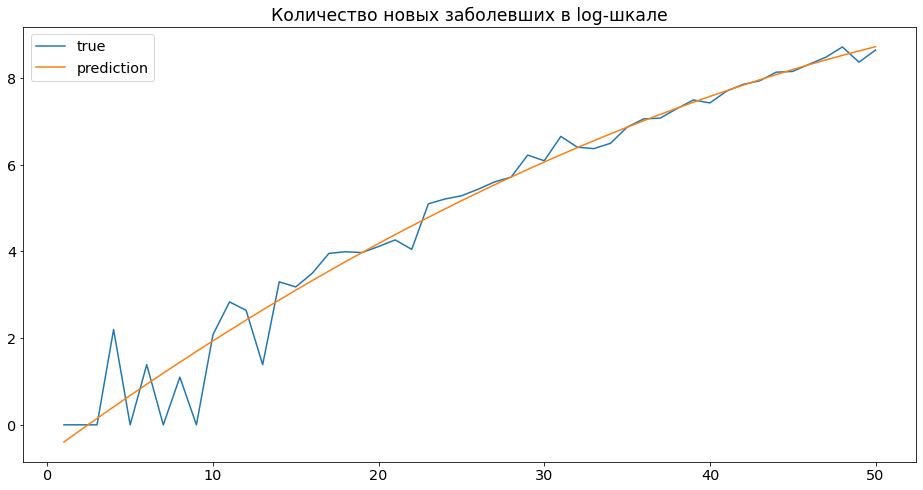

In [26]:
y_pred = lr.predict(x_train)

plt.figure(figsize=(16,8))
plt.title('Количество новых заболевших в log-шкале')
plt.plot(x_train[:,0], y_train, label='true')
plt.plot(x_train[:,0], y_pred, label='prediction')
plt.legend()

<function matplotlib.pyplot.legend(*args, **kwargs)>

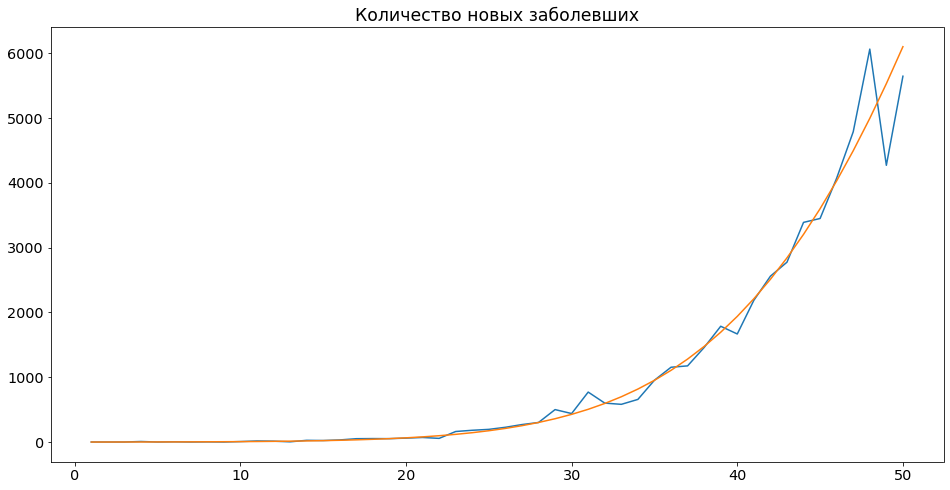

In [27]:
plt.figure(figsize=(16,8))
plt.title('Количество новых заболевших')
plt.plot(x_train[:,0], np.exp(y_train), label='true')
plt.plot(x_train[:,0], np.exp(y_pred), label='prediction')
plt.legend
#plt.ylim(0, 60000)

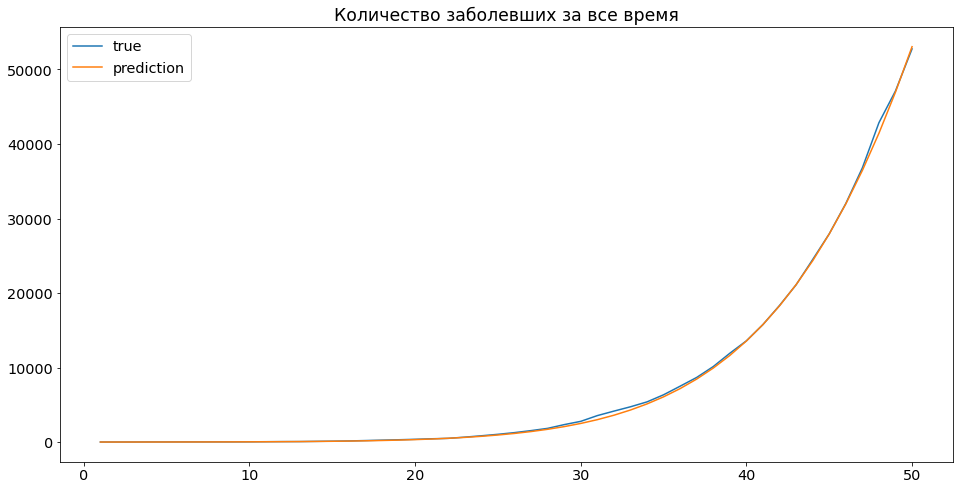

In [28]:
plt.figure(figsize=(16,8))
plt.title('Количество заболевших за все время')
plt.plot(x_train[:,0], covid_train['total_cases'].to_numpy(), label='true')
plt.plot(x_train[:,0], np.exp(y_pred).cumsum(), label='prediction')
plt.legend()

In [29]:
sigma_noise = np.std(y_pred - y_train)
sigma_noise

0.4891695424595195

In [30]:
# возьмем априорное распределение параметров модели
mu, sigma = np.array([0, 0, 0]), 2*np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

In [31]:
x_matrix = np.c_[np.ones(len(x_train)), x_train]

sigma_n = np.linalg.inv(
    np.linalg.inv(sigma) 
    + (1 / (sigma_noise ** 2)) * x_matrix.T @ x_matrix 
)
mu_n = sigma_n @ (np.linalg.inv(sigma) @ mu.T
                  + (1 / (sigma_noise ** 2)) * x_matrix.T @ np.array(y_train))

print(f'after bayesian update\nmean-vector:\n{mu_n}\ncovarience:\n{sigma_n}')

after bayesian update
mean-vector:
[-0.65815757  0.27801196 -0.00180872]
covarience:
[[ 4.56372295e-02 -3.61407824e-03  5.96369231e-05]
 [-3.61407824e-03  3.75436395e-04 -6.93174354e-06]
 [ 5.96369231e-05 -6.93174354e-06  1.36260727e-07]]


#### Это априорное распредление параметров

#### Вопрос 3c
Посэмплируйте много разных сигмоид из апостериорного распределения,
постройте графики. Сколько, исходя из этих сэмплов, будет всего случаев
коронавируса в России? Постройте эмпирическое предсказательное
распределение, нарисуйте графики. Каков ваш прогноз числа случаев
коронавируса в пессимистичном сценарии (90-й процентиль в выборке числа
случаев)? В оптимистичном сценарии (10-й процентиль)?

In [32]:
def myplot_sample_lines(mu, sigma, n=20, points=None):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu, sigma, n)

    # plt.axis('equal')
    for w in my_w:
        plt.plot(x_train[:,0], np.exp(x_matrix @ w).cumsum(), 'k-', lw=.4)
    plt.ylim((0, 60000))
    plt.xlim((0, 51))
    if not points is None:
        plt.scatter(points[0], points[1], marker='*', s=200)

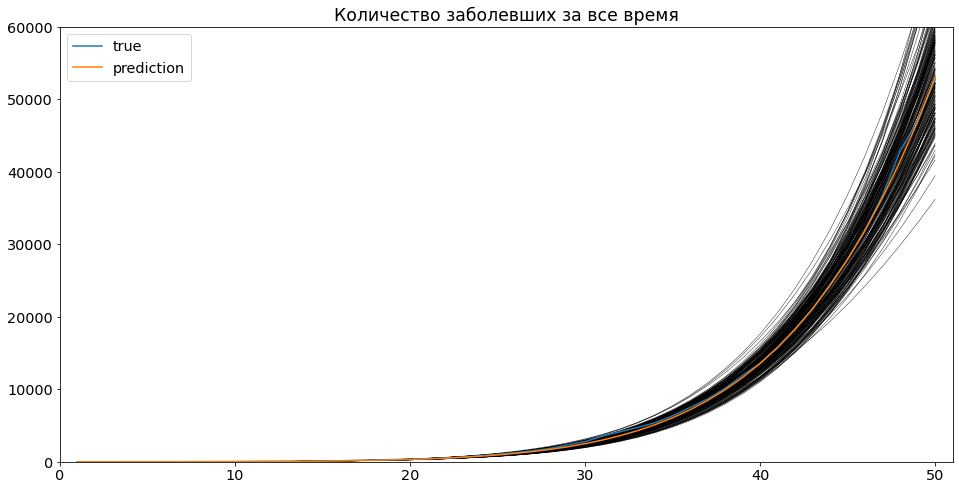

In [33]:
fig = plt.figure(figsize=(16, 8))
plt.title('Количество заболевших за все время')
myplot_sample_lines(mu_n, sigma_n, 200)
plt.plot(x_train[:,0], covid_train['total_cases'].to_numpy(), label='true')
plt.plot(x_train[:,0], np.exp(y_pred).cumsum(), label='prediction')
plt.legend()

In [34]:
xs = np.array(range(1, 61))

In [35]:
# Посэмплируем прямые и выдадим статистики по предсказаниям
def sample_statistics(mu, sigma, xs, n=20):
    my_w = np.random.multivariate_normal(mu, sigma, n)
    res = np.zeros((n, xs.shape[0]))
    for i,w in enumerate(my_w):
        res[i,:] = np.exp(w[0] + w[1]*xs + w[2]*xs**2).cumsum()
    return res

In [36]:
# Нарисуем результат
def plot_predictions(xs, mu, x):
    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(111)
    #ax.set_xlim((xs[0], xs[-1]))
    #ax.set_ylim((-2, 2))
    #ax.plot(xs, covid['total_cases'][:60].to_numpy(), label="Правильный ответ")
    ax.plot(xs, np.exp(mu[0] + mu[1]*xs + mu[2]*xs**2).cumsum(), color="red", label="MAP гипотеза")
    #ax.fill_between(xs, mu[1]*xs + mu[0] - .25, mu[1]*xs + mu[0] + .25, color=palette[1], alpha=.3, label="+- дисперсия шума")
    ax.fill_between(xs, np.mean(x, axis=0) - np.std(x, axis=0), np.mean(x, axis=0) + np.std(x, axis=0), color=palette[5], alpha=.2, label="+- дисперсия предсказаний")
    #ax.scatter(points[0], points[1], marker='*', s=200)
    ax.plot(xs, np.percentile(x, 10, axis=0), 'b--', label='10 quantile')
    ax.plot(xs, np.percentile(x, 90, axis=0), 'b--', label='90 quantile')
    ax.legend(fontsize=legend_fontsize)

In [37]:
sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
legend_fontsize = 16

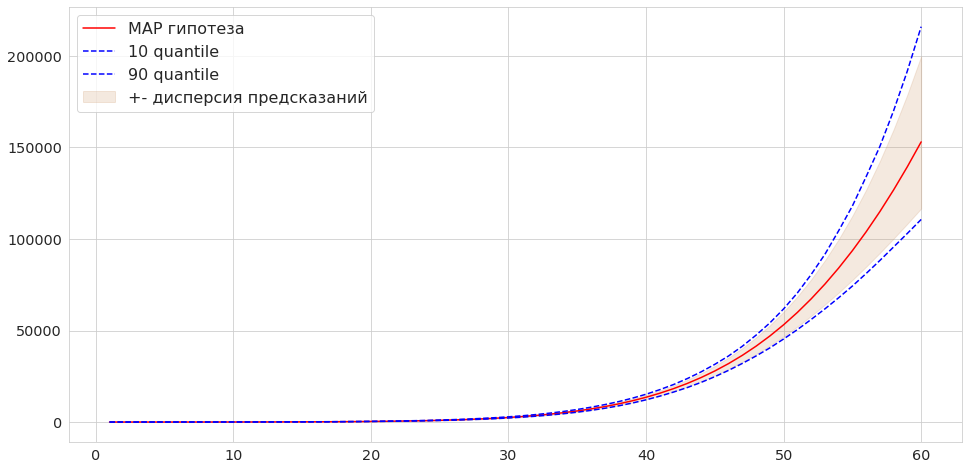

In [38]:
x = sample_statistics(mu_n, sigma_n, xs, n=1000)
plot_predictions(xs, mu_n, x)

In [39]:
print('Прогноз на 1-ое мая')
print('MAP гипотеза')
print(round(np.exp(mu_n[0] + mu_n[1]*xs + mu_n[2]*xs**2).cumsum()[59]))
print('Пессимистичный сценарий')
print(round(np.percentile(x, 90, axis=0)[59]))
print('Оптимистичный сценарий')
print(round(np.percentile(x, 10, axis=0)[59]))

Прогноз на 1-ое мая
MAP гипотеза
153050.0
Пессимистичный сценарий
215978.0
Оптимистичный сценарий
110667.0


#### Вопрос 4
Бонус : ​ проведите такой же анализ для других стран (здесь придётся руками
подобрать дни начала моделирования — коронавирус приходил в разные страны в
разное время). Насколько разные параметры получаются? Можно ли разделить
страны на кластеры (хотя бы чисто визуально) в зависимости от этих параметров?

In [40]:
covid = pd.read_csv('owid-covid-data.csv')

In [175]:
country_dict = {
    country : covid[(covid['location'] == country)][
        covid[(covid['location'] == country)]['new_cases'] > 5].date.min()
    for country in covid.location.unique()
}

del country_dict['Anguilla']
del country_dict['Bermuda']
del country_dict['Cayman Islands']
del country_dict['Faeroe Islands']
del country_dict['Fiji']
del country_dict['Gibraltar']
del country_dict['Greenland']
del country_dict['Guernsey']
del country_dict['Hong Kong']
del country_dict['Isle of Man']
del country_dict['Jersey']
del country_dict['Marshall Islands']
del country_dict['Vanuatu']
del country_dict['Micronesia (country)']
del country_dict['Northern Cyprus']
del country_dict['Saint Helena']
del country_dict['Saint Kitts and Nevis']
del country_dict['Samoa']
del country_dict['Solomon Islands']
del country_dict['Turks and Caicos Islands']
del country_dict['Benin']
del country_dict['France']
del country_dict['Guyana']
del country_dict['Israel']
del country_dict['Madagascar']
del country_dict['Mauritius']
del country_dict['Nepal']
del country_dict['New Zealand']
del country_dict['Papua New Guinea']
del country_dict['Uganda']
del country_dict['Uruguay']
del country_dict['Zimbabwe']

In [189]:
def analysis(country):
    #print(country)
    covid = pd.read_csv('owid-covid-data.csv')
    covid = covid[(covid['location'] == country)
          &(covid['date'] >= country_dict[country])]

    covid['new_cases'] = covid['new_cases'].replace(0, 1)
    if len(covid) < 50:
        return
    covid_train = covid.iloc[:50, :]
    covid_test = covid.iloc[:50, :]

#     fig = plt.figure(figsize=(16,8))
#     covid_train['new_cases'].plot()
#     plt.show()
#     fig = plt.figure(figsize=(16,8))
#     covid_train['total_cases'].plot()
#     plt.show()

    y_train = np.log(covid_train['new_cases'].to_numpy())
    x_train = np.array(range(1, len(y_train)+1))

    x_train = np.c_[x_train, x_train**2]
    y_train.shape, x_train.shape

    lr = LinearRegression()
    lr.fit(x_train, y_train)
    #print('linear regression params: ', lr.coef_, lr.intercept_)

    y_pred = lr.predict(x_train)

#     plt.figure(figsize=(16,8))
#     plt.title('Количество новых заболевших в log-шкале')
#     plt.plot(x_train[:,0], y_train, label='true')
#     plt.plot(x_train[:,0], y_pred, label='prediction')
#     plt.legend()
#     plt.show()

#     plt.figure(figsize=(16,8))
#     plt.title('Количество новых заболевших')
#     plt.plot(x_train[:,0], np.exp(y_train), label='true')
#     plt.plot(x_train[:,0], np.exp(y_pred), label='prediction')
#     plt.legend
#     #plt.ylim(0, 60000)
#     plt.show()

#     plt.figure(figsize=(16,8))
#     plt.title('Количество заболевших за все время')
#     plt.plot(x_train[:,0], covid_train['total_cases'].to_numpy(), label='true')
#     plt.plot(x_train[:,0], np.exp(y_pred).cumsum(), label='prediction')
#     plt.legend()
#     plt.show()

    sigma_noise = np.std(y_pred - y_train)
    #print('sigma noise: ', sigma_noise)

    # возьмем априорное распределение параметров модели
    mu, sigma = np.array([0, 0, 0]), 2*np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

    x_matrix = np.c_[np.ones(len(x_train)), x_train]

    sigma_n = np.linalg.inv(
        np.linalg.inv(sigma) 
        + (1 / (sigma_noise ** 2)) * x_matrix.T @ x_matrix 
    )
    mu_n = sigma_n @ (np.linalg.inv(sigma) @ mu.T
                      + (1 / (sigma_noise ** 2)) * x_matrix.T @ np.array(y_train))

    #print(f'after bayesian update\nmean-vector:\n{mu_n}\ncovarience:\n{sigma_n}')

#     def myplot_sample_lines(mu, sigma, n=20, points=None):
#         # Посэмплируем и порисуем прямые
#         my_w = np.random.multivariate_normal(mu, sigma, n)

#         # plt.axis('equal')
#         for w in my_w:
#             plt.plot(x_train[:,0], np.exp(x_matrix @ w).cumsum(), 'k-', lw=.4)
#         plt.ylim((0, 60000))
#         plt.xlim((0, 51))
#         if not points is None:
#             plt.scatter(points[0], points[1], marker='*', s=200)

#     fig = plt.figure(figsize=(16, 8))
#     plt.title('Количество заболевших за все время')
#     myplot_sample_lines(mu_n, sigma_n, 200)
#     plt.plot(x_train[:,0], covid_train['total_cases'].to_numpy(), label='true')
#     plt.plot(x_train[:,0], np.exp(y_pred).cumsum(), label='prediction')
#     plt.legend()

    xs = np.array(range(1, 61))

    # Посэмплируем прямые и выдадим статистики по предсказаниям
    def sample_statistics(mu, sigma, xs, n=20):
        my_w = np.random.multivariate_normal(mu, sigma, n)
        res = np.zeros((n, xs.shape[0]))
        for i,w in enumerate(my_w):
            res[i,:] = np.exp(w[0] + w[1]*xs + w[2]*xs**2).cumsum()
        return res

#     # Нарисуем результат
#     def plot_predictions(xs, mu, x):
#         fig = plt.figure(figsize=(16,8))
#         ax = fig.add_subplot(111)
#         #ax.set_xlim((xs[0], xs[-1]))
#         #ax.set_ylim((-2, 2))
#         #ax.plot(xs, covid['total_cases'][:60].to_numpy(), label="Правильный ответ")
#         ax.plot(xs, np.exp(mu[0] + mu[1]*xs + mu[2]*xs**2).cumsum(), color="red", label="MAP гипотеза")
#         #ax.fill_between(xs, mu[1]*xs + mu[0] - .25, mu[1]*xs + mu[0] + .25, color=palette[1], alpha=.3, label="+- дисперсия шума")
#         ax.fill_between(xs, np.mean(x, axis=0) - np.std(x, axis=0), np.mean(x, axis=0) + np.std(x, axis=0), color=palette[5], alpha=.2, label="+- дисперсия предсказаний")
#         #ax.scatter(points[0], points[1], marker='*', s=200)
#         ax.plot(xs, np.percentile(x, 10, axis=0), 'b--', label='10 quantile')
#         ax.plot(xs, np.percentile(x, 90, axis=0), 'b--', label='90 quantile')
#         ax.legend(fontsize=legend_fontsize)

    x = sample_statistics(mu_n, sigma_n, xs, n=1000)
#     plot_predictions(xs, mu_n, x)
    if ((covid['total_cases'].iloc[59] < np.percentile(x, 90, axis=0)[59]) 
        & (covid['total_cases'].iloc[59] > np.percentile(x, 10, axis=0)[59])):
        return [country, mu_n[0], mu_n[1], mu_n[2]]

In [190]:
lst = []

In [191]:
for i in country_dict:
    lst.append(analysis(i))

In [200]:
lst = [i for i in lst if i is not None]

In [194]:
df1 = pd.DataFrame(lst, columns=['country', 'w0', 'w1', 'w2'])

#### Ответ:
Взял все страны и у которых есть 60 дней нормальной статистики. За начало отсчета берется первый день, когда количество new_cases > 5. Пропустил их через последнюю модель и оставил только те страны, для которых предсказание на 60 день попадает в отрезок между 10 и 90 персентилями (дата для обучения - 50 дней).

Видно, что точки лежат примерно в одной плоскости от w1, w2. w1 и w2 - сильно скоррелированы.
Поэтому будем смотреть на w1 и w0.
Кажется, что есть плотный кластер для малых w1, в нем в основном экваториальные и африканские страны. Так же есть разреженный класс для больших w1, он не такой кучный по w0. В нем в основном расположены страны Европы

In [199]:
import plotly.express as px
#df = px.data.iris()
fig = px.scatter_3d(df1, x='w0', y='w1', z='w2',
              color='country', width=1000, height=800)
fig.show()